In [1]:
## importing stuff
import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
import javabridge
from bioformats import JARS as bfJARS
javabridge.start_vm(class_path=bfJARS, max_heap_size="20G")
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
# %aimport islets

from IPython.display import display
import pandas as pd

from islets.Recording import Recording, saveMovie
from islets.Regions import Regions
from islets.numeric import power_spectrum, rebin
from islets.utils import show_movie, saveRois
from islets.Regions import getPeak2BoundaryDF, getGraph_of_ROIs_to_Merge, mergeBasedOnGraph

from caiman import movie as cmovie

from matplotlib.colors import LogNorm

/opt/tljh/user/envs/physio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/tljh/user/envs/physio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/tljh/user/envs/physio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/tljh/user/envs/physio/lib/python3.7/site-packages/tensorflow/pyth

In [2]:
plt.rcParams["animation.embed_limit"] = 200

In [3]:
# recFile = "/data/Sandra/2019/2019_10_07/Experiment32b.lif" 
recFile = "/data/Sandra/2019/2019_10_08/Experiment33a.lif" 

In [4]:
rec = Recording(recFile)

In [5]:
rec.metadata

Name  SizeT  SizeX  SizeY  SizeZ  pxSize pxUnit bit depth  Frequency  \
0    Image007      1   1024   1024      1   0.242     µm     uint8        NaN   
1    Image009      1   1024   1024      1   0.242     µm     uint8        NaN   
2   Series010   1671    512    512      1   0.484     µm     uint8       1.98   
3   Series011    213    512    512      1   0.484     µm     uint8       2.00   
4   Series012    358    512    512      1   0.484     µm     uint8       1.99   
5   Series019      1    128    128     18   1.950     µm     uint8        NaN   
6   Series020     26    128    128     18   1.950     µm     uint8       8.74   
7   Series023   1712    128    128     18   1.950     µm     uint8       8.47   
8  Preview024      1    512    512      1   0.484     µm     uint8        NaN   

           Start time            End time                  Duration  \
0 2048-04-23 10:52:24                 NaT                       NaT   
1 2019-10-08 11:15:47                 NaT                       NaT   
2 2019-10-08 11:16:51 2019-10-08 11:30:53 0 days 00:14:02.424999237   
3 2019-10-08 11:31:01 2019-10-08 11:32:47 0 days 00:01:46.500999451   
4 2019-10-08 11:32:55 2019-10-08 11:35:54 0 days 00:02:59.688999176   
5 2019-10-08 11:49:21                 NaT                       NaT   
6 2019-10-08 11:49:33 2019-10-08 11:49:35 0 days 00:00:02.975999832   
7 2019-10-08 11:55:11 2019-10-08 11:58:33 0 days 00:03:22.045999527   
8                 NaT                 NaT                       NaT   

   Z-stack height line scan  
0             NaN      none  
1             NaN      none  
2             NaN      none  
3             NaN      none  
4             NaN      none  
5            1.93      none  
6            1.93      none  
7            1.58      none  
8             NaN      none

In [6]:
# rec.parse_metadata()

In [7]:
iSeries = 7
metadata = rec.metadata.loc[iSeries]

In [8]:
rec.metadata["Frequency"] = 8.4

In [9]:
rec.import_series("Series023")

In [10]:
data = np.array([[rec.rdr.read(series=iSeries,t=t,z=z,c=0, rescale=False) for z in range(metadata.SizeZ)] for t in range(metadata.SizeT)])

In [11]:
mean3D = data.mean(axis=0)
# std3D = data.std(axis=0)
# diff_std3D = np.diff(data).std(axis=0)

In [12]:
show_movie(mean3D,log=True, autoadjust=False, figScale=3)

In [13]:
import plotly_express as plx

In [14]:
# s3d = mean3D[:,::,::]
# z,x,y = np.meshgrid(*map(range,s3d.shape), indexing="ij")
# fltr = s3d>np.percentile(s3d,99)
# x = x[fltr]
# y = y[fltr]
# z = z[fltr]
# plx.scatter_3d(
#     x=x,
#     y=y,
#     z=z,
# #     size=np.clip(s3d[fltr]/100,.0000001,.1),
#     size=s3d[fltr]**2/100,
# #     size=[.001]*fltr.sum()
# )
# # plx.scatter_3d(
# #     x=x.flat,
# #     y=y.flat,
# #     z=z.flat,
# #     size=(s3d**4/1000).flatten(),
# # )

In [15]:
# rrs = [Regions(cmovie(data[:,z], fr=metadata.Frequency), gSig_filt=(3,4), diag=True) for z in range(data.shape[1])]

In [16]:
# for r in rrs:
#     r.calcTraces()

In [17]:
# rrs[-4].examine()

In [18]:
from islets.Regions3D import climb

In [19]:
from islets.Regions3D import crawlDict

In [20]:
from cv2 import GaussianBlur

In [21]:
mean3D_blurred = GaussianBlur(mean3D.T,(5,5),-1).T
mean3D_blurred = GaussianBlur(mean3D_blurred,(3,1),-1)

In [22]:
b = crawlDict(mean3D_blurred[:], processes=10)
len(b)

571

In [23]:
from islets.Regions3D import Regions as Reg3D

In [24]:
r3d = Reg3D(b, full=False)

In [25]:
from collections import OrderedDict

In [26]:
r3d.df = pd.DataFrame(OrderedDict([
            ("peak",  list(b.keys())),
            ("pixels",list(b.values())),
            ("size",  list(map(len, b.values())))
        ]))

In [27]:
r3d.statImages = {"mean":mean3D}

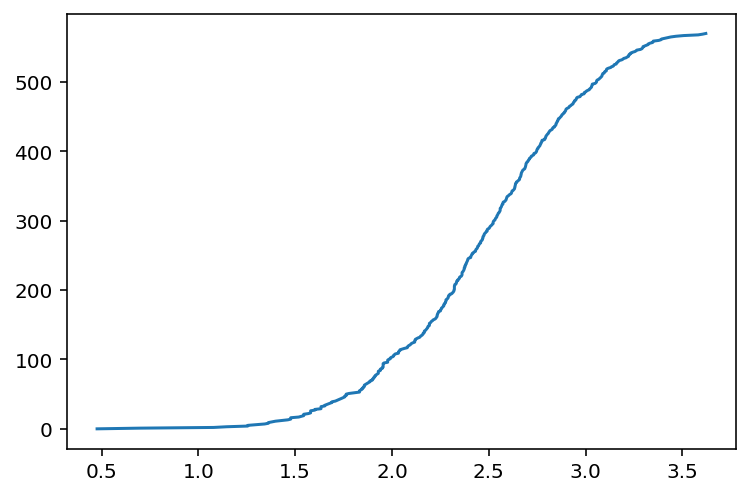

In [28]:
plt.plot(np.log10(r3d.df["size"].sort_values()), np.arange(len(r3d.df)))

In [29]:
r3d.df.drop(index= r3d.df.query("size<100").index, inplace=True)

In [30]:
r3d.df.shape

(467, 3)

In [31]:
r3d.calcTraces(data, fr=metadata.Frequency)

In [32]:
r3d.df.columns

Index(['peak', 'pixels', 'size', 'trace'], dtype='object')

In [33]:
r3d.Freq = 8.4

In [34]:
r3d.time = np.arange(len(data))/8.4

In [36]:
ts=5
r3d.fast_filter_traces(ts,Npoints=np.inf, z_sp=3)

Nrebin = 1
13


In [37]:
zz = np.vstack(r3d.df["zScore_%g"%ts])

In [38]:
df = r3d.df.query("size>500")
z,x,y = np.vstack(df.peak).T

fig = plx.scatter_3d(
    x=x*metadata.pxSize,
    y=y*metadata.pxSize,
    z=z*1.93,
    size=df["size"],
    size_max = 30,
#     color=np.log(10+np.sum(zz>3,1))
    color=np.mean(zz[r3d.df.index.isin(df.index),:len(r3d.time)//2]>3,1),
#     hoverinfo="text",
#     hovertext=r3d.df.index
#     size=[.001]*fltr.sum()
)
fig.update_layout(scene_aspectmode='data')

In [ ]:
df = r3d.df.query("size>500")
z,x,y = np.vstack(df.peak).T

fig = plx.scatter_3d(
    x=x*metadata.pxSize,
    y=y*metadata.pxSize,
    z=z*1.93,
    size=df["size"],
    size_max = 30,
#     color=np.log(10+np.sum(zz>3,1))
    color=np.mean(zz[r3d.df.index.isin(df.index),len(r3d.time)//2:]>3,1),
#     hoverinfo="text",
#     hovertext=r3d.df.index
#     size=[.001]*fltr.sum()
)
fig.update_layout(scene_aspectmode='data')

In [ ]:
%matplotlib inline

In [ ]:
plt.plot(
    (zz[:,:zz.shape[1]//2]>3).mean(1),
    (zz[:,zz.shape[1]//2:]>3).mean(1),"."
)
plt.xscale("log")
plt.yscale("log")
plt.plot([1e-3,1],[1e-3,1])
plt.gca().set_aspect("equal")

In [ ]:
%matplotlib notebook

In [ ]:
try:
    t = r3d.showTime['%g'%ts]
except:
    t = r3d.time
plt.figure(figsize=(10,4))
ia = 0
for ix in r3d.df.index[np.argsort(np.sum(zz>4,axis=1))[::-1]][:10]:
    plt.plot(t, r3d.df.loc[ix,"zScore_%g"%ts]+20*ia,lw=.5)
    ia +=1 

In [ ]:
plt.plot(zz.mean(1), r3d.df["size"],".")
plt.xscale("log")
plt.yscale("log")